<a href="https://colab.research.google.com/github/Ftajedini/Github_Tutorial/blob/main/man_woman_detection_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from tensorflow.keras.models import load_model
#برای لود تصاویر
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


دستور انتقال فایل به گوگل درایو




In [5]:
!cp"/content/convnet_transfer_learning_augmentation.h5""/content/drive/MyDrive/"

/bin/bash: line 1: cp/content/convnet_transfer_learning_augmentation.h5/content/drive/MyDrive/: No such file or directory


دستور انتقال فایل از گوگل درایو به کولب

In [ ]:
#!cp "/content/drive/MyDrive/convnet_transfer_learning_augmentation.h5""."

#Load model

In [98]:
model = load_model('convnet_transfer_learning_augmentation.h5')

#Load sample images

In [114]:
image_files = glob('images/*.jp*')

In [115]:
image_files

['images/face_mask_1.jpg',
 'images/face4.jpg',
 'images/face2.jpg',
 'images/face6.jpg',
 'images/face3.jpg',
 'images/face5.jpg']

In [116]:
def load_image(image_path):
    img = image.load_img(image_path,target_size=(180, 180))
    img_arr = image.img_to_array(img)
    #img_arr = img_arr.reshape(1, 180, 180, 3)
    return img_arr

In [117]:
images = []
for image_path in image_files:
    img_arr = load_image(image_path)
    images.append(img_arr)
images = np.array(images)

In [118]:
images.shape

(6, 180, 180, 3)

In [119]:
preds = model.predict(images)

1/1 [==============================] - 2s 2s/step


In [120]:
preds

array([[9.2631572e-01],
       [9.3472505e-01],
       [9.9999660e-01],
       [7.1777242e-01],
       [9.9938822e-01],
       [1.2112327e-05]], dtype=float32)

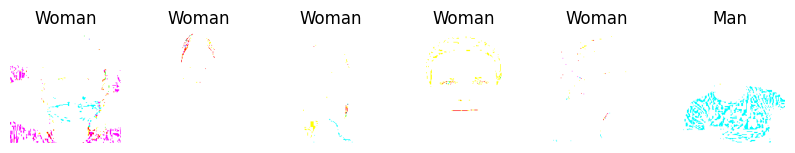

In [124]:
fig, axes = plt.subplots(1,6, figsize=(12,5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title('Man' if preds[i]<0.5 else 'Woman')
    ax.set_axis_off()
plt.show()

In [143]:
#خیلی جاها رنگ مضر است بهتر است سیاه سفید کنیم
image_path = 'images/face5.jpg'
img1 = image.load_img(image_path,target_size=(180, 180))
img1_arr = image.img_to_array(img1)

In [144]:
img1_arr.shape

(180, 180, 3)

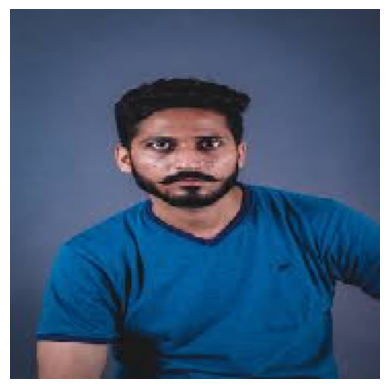

In [145]:
plt.imshow(img1)
plt.axis('off')
plt.show()

In [146]:
#tabdil be 4 boad
img1_arr = img1_arr.reshape(1, 180, 180, 3)
#img1_arr = np.expan_dims(img1_arr, axis=0)
img1_arr.shape

(1, 180, 180, 3)

In [139]:
#type(img1)

#Test model

In [147]:
pred1= model.predict(img1_arr)

1/1 [==============================] - 0s 353ms/step


In [148]:
print(pred1)

[[1.2112338e-05]]


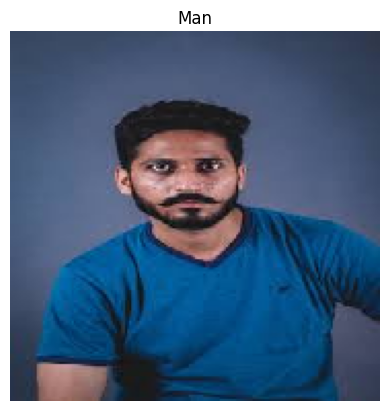

In [149]:
plt.imshow(img1)
plt.axis('off')
plt.title('Man' if pred1<0.5 else 'Woman')
plt.show()